In [48]:
%pylab inline
from pylab import rcParams
from math import log
rcParams['figure.figsize'] = 16, 10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (24, 18), 
        "axes.titlesize" : 18 
    }
)

Populating the interactive namespace from numpy and matplotlib


C:\Prog\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [49]:
df = pd.read_csv('data/train.csv', dtype={'Age': np.float16})
ts = pd.read_csv('data/test.csv', dtype={'Age': np.float16})

### Show data

In [50]:
# print(df.shape)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Show types and null's

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Map data to numerical format

In [52]:
gender_map = {'male':0, 'female':1}
df['Sex0'] = df['Sex'].map(gender_map)
ts['Sex0'] = ts['Sex'].map(gender_map)

### Show basic numerical data distribution

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex0
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [54]:
ts.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex0
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EF52B50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x01395FD0>]], dtype=object)

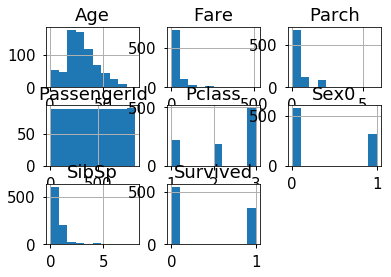

In [55]:
df.hist()

### Check correlation between Survived and numerical columns

In [56]:
df.groupby(['Survived'])[df.columns[2:]].agg([np.mean, np.std])

Pclass                  Age                SibSp            \
              mean       std       mean        std      mean       std   
Survived                                                                 
0         2.531876  0.735805  30.626179  14.172110  0.553734  1.288399   
1         1.950292  0.863321  28.343690  14.950952  0.473684  0.708688   

             Parch                 Fare                 Sex0            
              mean       std       mean        std      mean       std  
Survived                                                                
0         0.329690  0.823166  22.117887  31.388207  0.147541  0.354968  
1         0.464912  0.771712  48.395408  66.596998  0.681287  0.466660

In [57]:
#cols = ['Survived', 'Pclass', 'Sex0', 'Fare'] # , 'Age', 'SibSp', 'Parch'
#sns_plot = sns.pairplot(df[cols])
#sns_plot.savefig('pairplot.png')

In [58]:
X_columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex0'] #, 'Age'
model_columns = np.concatenate((['Survived'], X_columns))

In [59]:
df.groupby(df.Survived)[model_columns].agg([np.mean, np.std])

Survived         Pclass               SibSp               Parch  \
             mean  std      mean       std      mean       std      mean   
Survived                                                                   
0               0  0.0  2.531876  0.735805  0.553734  1.288399  0.329690   
1               1  0.0  1.950292  0.863321  0.473684  0.708688  0.464912   

                         Fare                 Sex0            
               std       mean        std      mean       std  
Survived                                                      
0         0.823166  22.117887  31.388207  0.147541  0.354968  
1         0.771712  48.395408  66.596998  0.681287  0.466660

In [60]:
df.groupby(df.Survived)['Pclass'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [61]:
df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [62]:
df.groupby(['Pclass', 'Survived'])[model_columns].agg([np.mean, np.std])

Survived      Pclass          SibSp               Parch  \
                    mean  std   mean  std      mean       std      mean   
Pclass Survived                                                           
1      0               0  0.0      1  0.0  0.287500  0.555610  0.300000   
       1               1  0.0      1  0.0  0.492647  0.632412  0.389706   
2      0               0  0.0      2  0.0  0.319588  0.550500  0.144330   
       1               1  0.0      2  0.0  0.494253  0.644720  0.643678   
3      0               0  0.0      3  0.0  0.672043  1.504700  0.384409   
       1               1  0.0      3  0.0  0.436975  0.829934  0.420168   

                                Fare                 Sex0            
                      std       mean        std      mean       std  
Pclass Survived                                                      
1      0         0.700813  64.684008  60.662089  0.037500  0.191182  
       1         0.690387  95.608029  85.286820  0.669118  0.472270  
2      0         0.432765  19.412328  15.307175  0.061856  0.242145  
       1         0.820904  22.055700  10.853502  0.804598  0.398809  
3      0         0.914144  13.669364  12.118338  0.193548  0.395611  
       1         0.807757  13.694887  10.692993  0.605042  0.490909

### Cross Tab

In [63]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [64]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [65]:
df[model_columns].count()

Survived    891
Pclass      891
SibSp       891
Parch       891
Fare        891
Sex0        891
dtype: int64

## Visualize

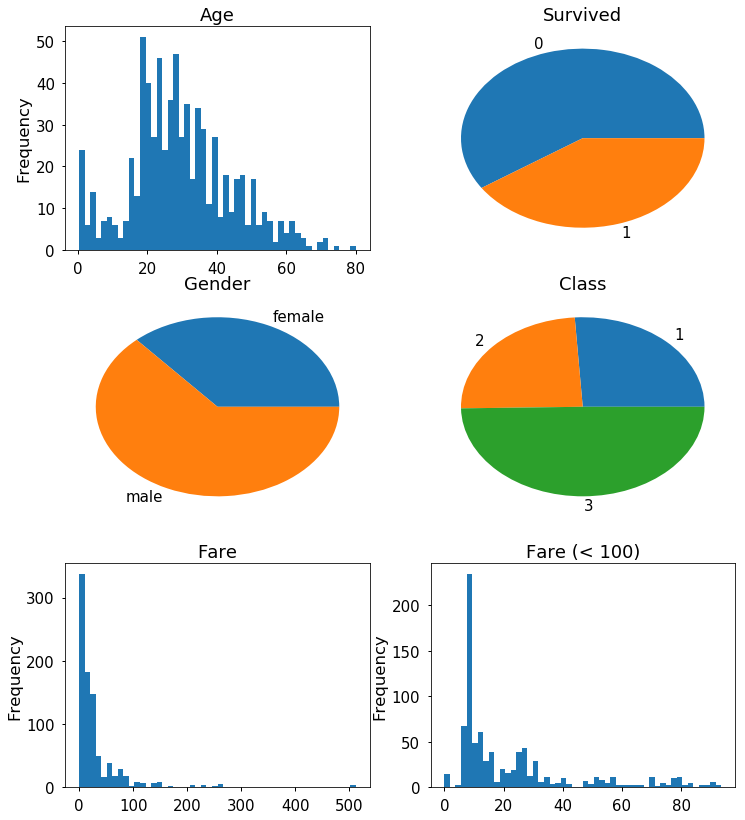

In [94]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(12, 14))
df.Age.plot.hist(bins=50, title='Age', ax=axs[0, 0])
df.groupby('Survived').agg('count')['Age'].plot.pie(title='Survived', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
df.groupby('Sex').agg('count')['Age'].plot.pie(title='Gender', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
df.groupby('Pclass').agg('count')['Age'].plot.pie(title='Class', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
fare = df.Fare
fare.plot.hist(bins=50, title='Fare', ax=axs[2, 0])
fare[fare < 100].plot.hist(bins=50, title='Fare (< 100)', ax=axs[2, 1])

### Clean null data

In [66]:
df2 = df[model_columns] #df[model_columns].dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Sex0        891 non-null int64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


In [67]:
ts2 = ts[X_columns].dropna()
ts2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 5 columns):
Pclass    417 non-null int64
SibSp     417 non-null int64
Parch     417 non-null int64
Fare      417 non-null float64
Sex0      417 non-null int64
dtypes: float64(1), int64(4)
memory usage: 19.5 KB


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = {
        "Nearest Neighbors":    KNeighborsClassifier(18),
        "Linear SVM":           SVC(kernel="linear", C=0.025),
        "RBF SVM":              SVC(gamma=0.006, C=1),
        # "Gaussian Process":     GaussianProcessClassifier(1.0 * RBF(1.0)),
        "Decision Tree":        DecisionTreeClassifier(max_depth=7),
        "Random Forest":        RandomForestClassifier(max_depth=6, n_estimators=8, max_features=1),
        "Neural Net":           MLPClassifier(alpha=0.001),
        "AdaBoost":             AdaBoostClassifier(),
        "Naive Bayes":          GaussianNB(),
        "QDA":                  QuadraticDiscriminantAnalysis()
    }

In [77]:
df_fit, df_test = df2.loc[:750, :], df2.loc[750:, :]
pd_X = df_fit.loc[:, X_columns]
pd_Y = df_fit.Survived
pd_test_X = df_test.loc[:, X_columns]
pd_test_Y = df_test.Survived
pd_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 5 columns):
Pclass    751 non-null int64
SibSp     751 non-null int64
Parch     751 non-null int64
Fare      751 non-null float64
Sex0      751 non-null int64
dtypes: float64(1), int64(4)
memory usage: 29.4 KB


In [83]:
X = np.asarray(pd_X)
Y = np.asarray(pd_Y)
X_test = np.asarray(pd_test_X)
Y_test = np.asarray(pd_test_Y)

for c in classifiers:
    clf = classifiers[c]
    clf.fit(X, Y)
    print('{:>20}  (Self score : {:.2f}%) ===> Test score : == {:.2f}% =='
          .format(c, clf.score(X, Y)*100, clf.score(X_test, Y_test)*100))

   Nearest Neighbors  (Self score : 76.30%) ===> Test score : == 80.14% ==
          Linear SVM  (Self score : 78.56%) ===> Test score : == 79.43% ==
             RBF SVM  (Self score : 68.04%) ===> Test score : == 73.05% ==
       Decision Tree  (Self score : 85.75%) ===> Test score : == 80.85% ==
       Random Forest  (Self score : 83.22%) ===> Test score : == 81.56% ==
          Neural Net  (Self score : 80.56%) ===> Test score : == 82.27% ==
            AdaBoost  (Self score : 82.42%) ===> Test score : == 78.72% ==
         Naive Bayes  (Self score : 78.96%) ===> Test score : == 82.27% ==
                 QDA  (Self score : 78.83%) ===> Test score : == 80.14% ==


In [71]:
score_self = []
score = []

for p in range(5):
    #p = p + 1
    p=pow(0.1,p)
    clf = MLPClassifier(alpha=p, hidden_layer_sizes=(200,))
    clf.fit(X, Y)
    ss = clf.score(X, Y)
    score_self.append(ss)
    s = clf.score(X_test, Y_test)
    score.append(s)
    print('P = {:>3} (Self score : {:.2f}%) ===> Test score : == {:.2f}% =='.format(p, ss*100, s*100))


P = 1.0 (Self score : 78.84%) ===> Test score : == 78.26% ==
P = 0.1 (Self score : 80.64%) ===> Test score : == 78.77% ==
P = 0.010000000000000002 (Self score : 78.04%) ===> Test score : == 78.01% ==
P = 0.0010000000000000002 (Self score : 77.64%) ===> Test score : == 76.98% ==
P = 0.00010000000000000002 (Self score : 80.64%) ===> Test score : == 78.77% ==


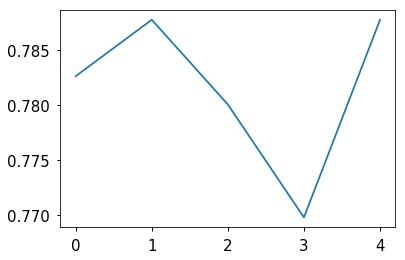

In [72]:
plot(score)

## Principal Components Analysis

In [91]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

train_features = ['Age', 'Fare', 'Sex0', 'Pclass', 'Child']
train_data = df.copy() # copy
train_data['Child'] = train_data.apply(lambda row: 1 if row['Age'] < 15 else 0, axis=1)
train_data = train_data[train_features].dropna()
# train_data['Sex_number'] = train_data.apply(lambda row: 0 if row['Sex'] == 'male' else 1, axis=1)
train_X = train_data.as_matrix()

my_pca = PCA(n_components=2)
preprocessed_train = preprocessing.normalize(preprocessing.scale(train_X))
print(preprocessed_train.shape)
#missing feature scaling and normalization
my_pca.fit(preprocessed_train)
trans = my_pca.transform(preprocessed_train)

(714, 5)


Text(0.5,1,'Fare')

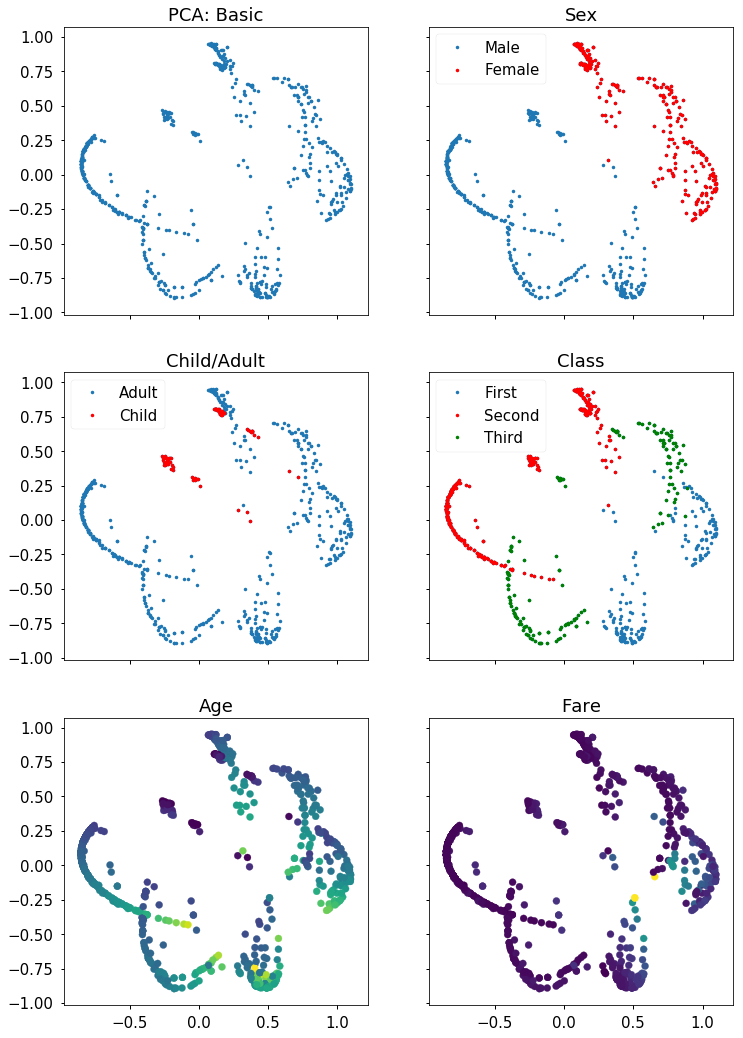

In [97]:
ig, axs = plt.subplots(3, 2, squeeze=False, sharex=True, sharey=True, figsize=(12, 18))
axs[0, 0].plot(trans[:,0], trans[:,1], '.')
axs[0, 0].set_title('PCA: Basic')

female_trans = np.array([tran for is_female, tran in zip(train_data['Sex0'], trans) if is_female==1])
axs[0, 1].plot(trans[:,0], trans[:,1], '.', label='Male')
axs[0, 1].plot(female_trans[:,0], female_trans[:,1], 'r.', label='Female')
axs[0, 1].set_title('Sex')
axs[0, 1].legend()

child_trans = np.array([tran for is_child, tran in zip(train_data['Child'], trans) if is_child==1])
axs[1, 0].plot(trans[:,0], trans[:,1], '.', label='Adult')
axs[1, 0].plot(child_trans[:,0], child_trans[:,1], 'r.', label='Child')
axs[1, 0].set_title('Child/Adult')
axs[1, 0].legend()

third_trans = np.array([tran for my_class, tran in zip(train_data['Pclass'], trans) if my_class==3])
second_trans = np.array([tran for my_class, tran in zip(train_data['Pclass'], trans) if my_class==2])
axs[1, 1].plot(trans[:,0], trans[:,1], '.', label='First')
axs[1, 1].plot(third_trans[:,0], third_trans[:,1], '.r', label='Second')
axs[1, 1].plot(second_trans[:,0], second_trans[:,1], '.g', label='Third')
axs[1, 1].set_title('Class')
axs[1, 1].legend()

axs[2, 0].scatter(trans[:,0], trans[:,1], edgecolors='face', c=train_data['Age'].as_matrix())
axs[2, 0].set_title('Age')

axs[2, 1].scatter(trans[:,0], trans[:,1], edgecolors='face', c=train_data['Fare'].as_matrix())
axs[2, 1].set_title('Fare')